<a href="https://colab.research.google.com/github/mariluvarela/Clases-de-Ciencia-de-Datos/blob/main/Modelos_de_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Clustering con SciKit-Learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from zipfile import ZipFile
import io
from urllib.request import urlopen
import requests

+ ## Descripción y Exploración del Dataset:

In [ ]:
# Se importa un dataset que contiene datos de un mall y sus consumidores
# Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
data=pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv",
                    sep = ",", encoding='utf-8')
data.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},axis=1,inplace=True)
display(data.head(5))


,CustomerID,Genre,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Aplicamos metodo .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Aplicamos metodo describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


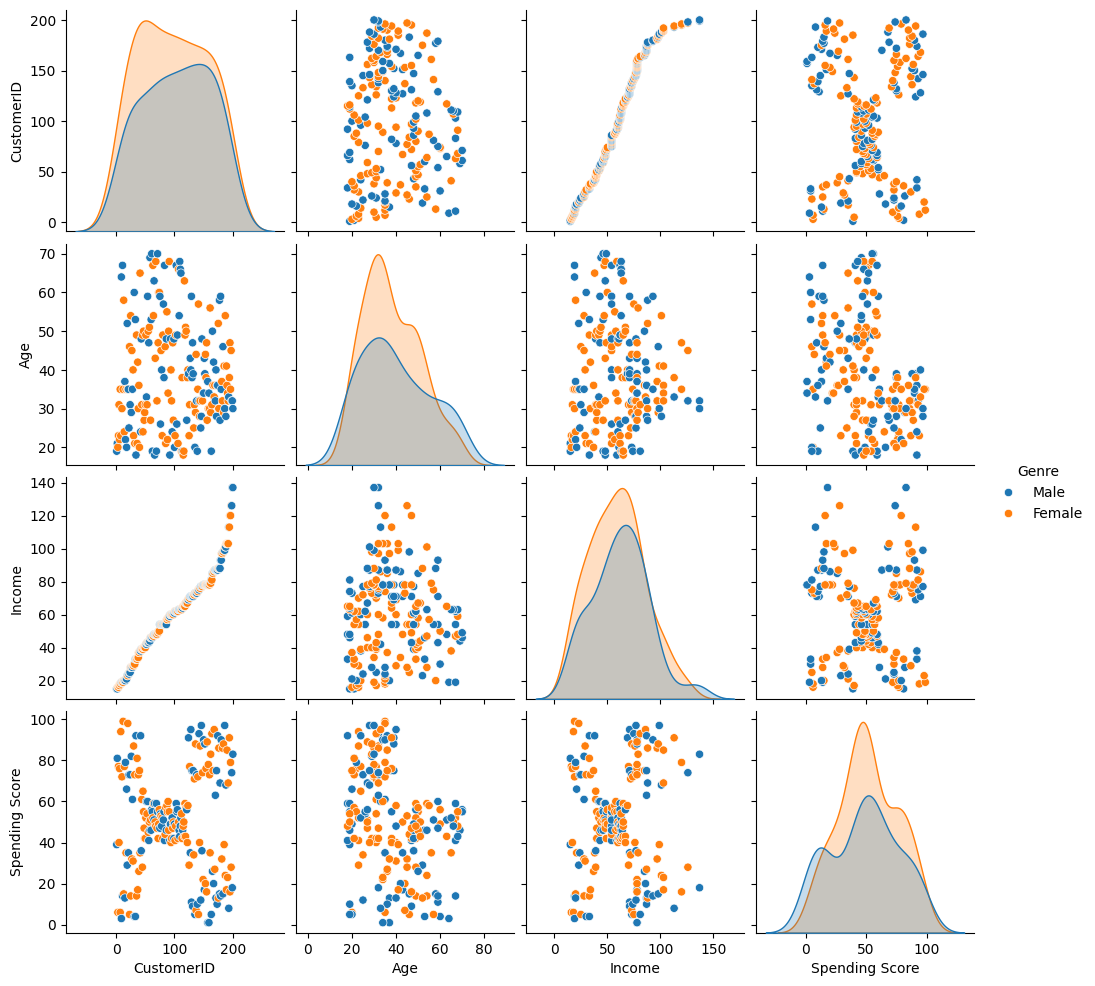

In [ ]:
# Hacemos un pairplot de las variables
plot01 = sns.pairplot(data, hue='Genre', corner=False)

## 1. Clustering por K-Means

In [ ]:
# Importamos las librerias necesarias para implementar un modelo K-Means y un estandarizador de variables
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score

In [ ]:
# Se consideran las variables Income y Spending Score
X = data[['Income','Spending Score']]

# Estandarizamos las variables:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X);

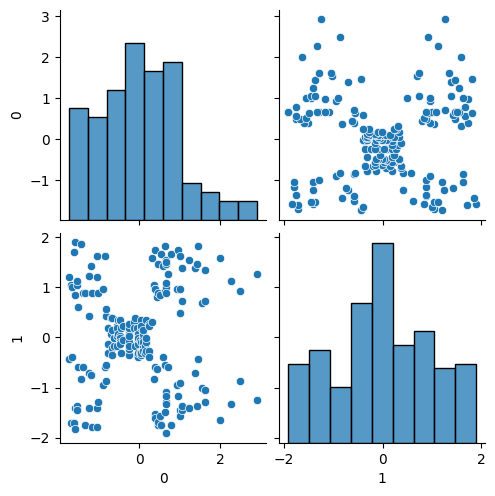

In [ ]:
# Hacemos un pairplot de las variables
plot01 = sns.pairplot(pd.DataFrame(X_scaled), corner=False)

In [ ]:
#Instanciamos el modelo de K-Means y lo entrenamos. Almacenamos las predicciones

k_clusters = 5
kmeans = KMeans(n_clusters = k_clusters, n_init = 20, max_iter = 350)
kmeans.fit(X_scaled)

# Guardamos las etiquetas generadas por el modelo y las coordenadas de los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Spending Score')

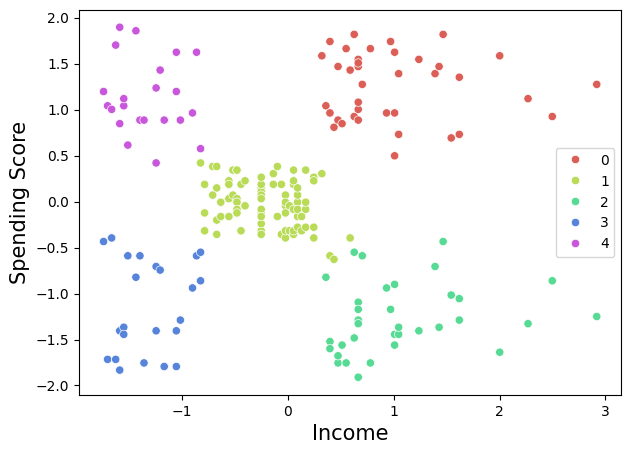

In [ ]:
# Creamos un Scatterplot discriminando los puntos por el cluster al que pertenecen (segun el modelo)
fig, (ax01) = plt.subplots(1, 1, figsize=(7,5))

X_plot02 = X_scaled #X.values

plot02 = sns.scatterplot(x = X_plot02[:,0],y = X_plot02[:,1],hue = labels,legend = 'full',
                         palette = sns.color_palette("hls", k_clusters), ax = ax01)
plot02.set_xlabel('Income',fontsize = 15)
plot02.set_ylabel('Spending Score',fontsize = 15)

In [ ]:
# Imprimimos las etiquetas
pd.DataFrame(labels)[0].value_counts()

,count
0,
1,81
0,39
2,35
3,23
4,22


### 1.2 Cómo elegir k y evaluar el clustering
+ Se aplica criterio del codo, basado en la suma de las distancias de cada observación a su centroide asignado

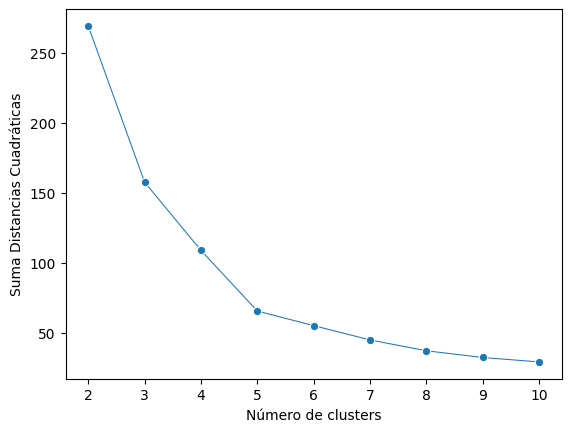

In [ ]:
# Se instancia una lista vacía, en la que se almacenará la suma de distancias
sq_distances = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Se entrenan 9 K-means con los valores de K almacenados en k_values
for k in k_values:
    kmeans_inertia = KMeans(n_clusters = k, n_init = 10, random_state = 0) # Se instancia K-means, con el valor de K dado
    kmeans_inertia.fit(X_scaled) # Se aplica método fit
    sq_distances.append(kmeans_inertia.inertia_) # Se almacena la suma de distancias (se aplica el método inertia_)

# Se graficó las sumas de las distancias
sns.lineplot(x=k_values,y=sq_distances, marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

+ Aplicamos métrica Silhouette

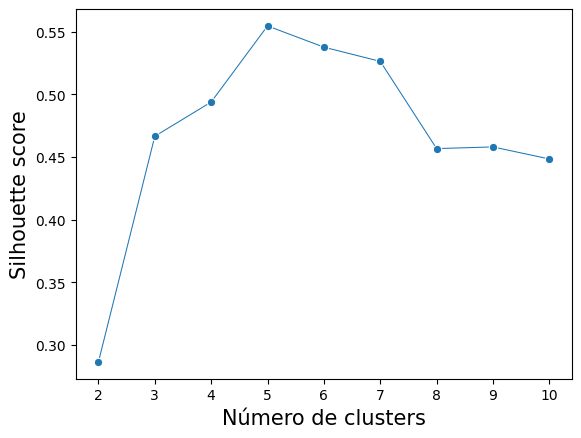

In [ ]:
# Se instancia una lista vacía, en la que se almacenará la métrica Silhouette
sil_distances = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    kmeans_silhouette = KMeans(n_clusters = k, n_init = 10, random_state = 0) # Se instancia K-means, con el valor de K dado
    kmeans_silhouette.fit(X_scaled) # Se aplica método fit
    score = silhouette_score(X_scaled,kmeans_silhouette.labels_) # Se calculan las métricas Silhouette
    sil_distances.append(score) # Se almacena la suma de distancias (se aplica el método inertia_)

# Se graficó las sumas de las distancias
sns.lineplot(x = k_values, y = sil_distances, marker = 'o', size = 30, legend = False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

## 2. Clustering Jerárquico

In [ ]:
# Importamos metodos de la libreria scipy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Notar que en ese caso utilizamos una nueva libreria :scipy
# Mas informacion acerca de la libreria: https://docs.scipy.org/doc/scipy/tutorial/general.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

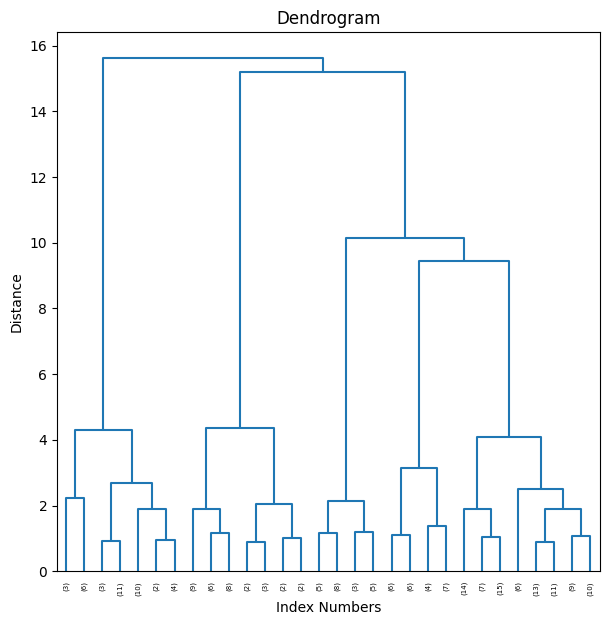

In [ ]:
# X_array
# X_scaled

#Instanciamos el modelo de clustering jerarquico, especificando el metodo de aglomeracion ('complete', ' ward', 'average', 'single')
Z = linkage(X_scaled, 'ward')

# Graficamos el dendrograma
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=5.,
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

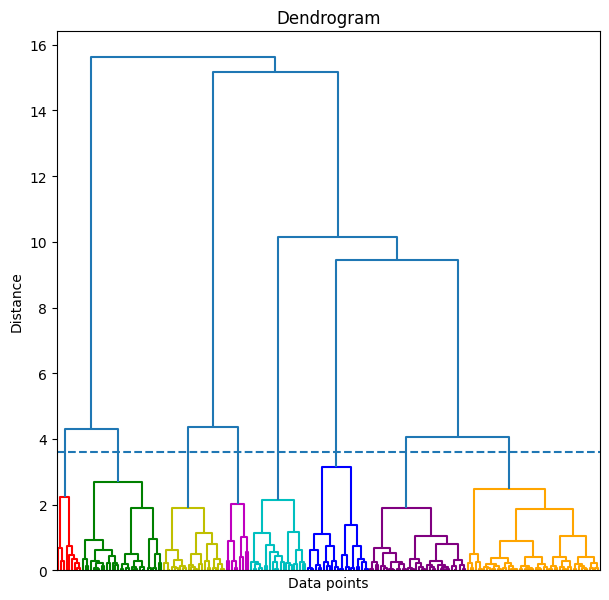

In [ ]:
from scipy.cluster import hierarchy

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['r','g','y','m','c', 'b', 'purple', 'orange'];

hierarchy.set_link_color_palette(color_palette)

threshold = 3.6

#fig, ax01 = plt.subplots(1, 1, figsize=(11,7))

dendrogram(
    Z,
    leaf_rotation = 90.,
    leaf_font_size = 5.,
    color_threshold = threshold,
    #ax=ax01
)
plt.hlines(threshold, 0, 2000,linestyle='--')
plt.xticks([])
plt.show()

+ ### Realizamos un cluster jerárquico con las 4 métricas disponibles de distancia

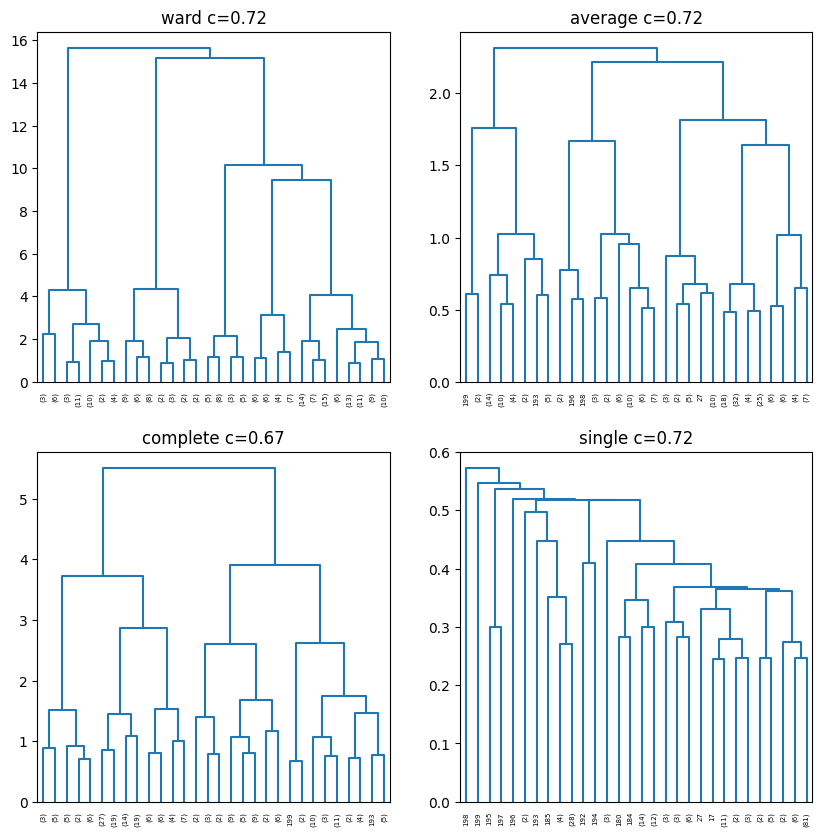

In [ ]:
#Se define una funcion que aplica un cluster jerárquico, teniendo parametrizado el umbral, la métrica de distancia, y finalmente grafica
def plot_dendrogram(X_sc, method, axis, umbral = 0):
    Z = linkage(X_sc, method)
    c,dists=cophenet(Z, pdist(X_sc));
    axis.set_title(method+' c='+str(np.around(c,2)))
    axis.set_xticklabels([])
    dendrogram(
        Z,
        leaf_rotation = 90.,
        leaf_font_size = 5.,
        color_threshold = umbral,
        truncate_mode = 'lastp',
        ax = axis
    )
    return



fig, axes = plt.subplots(2, 2, figsize = (10, 10))

umbral = 0

plot_dendrogram(X_scaled,'ward', axes[0,0], umbral = umbral)
plot_dendrogram(X_scaled,'average', axes[0,1], umbral = umbral)
plot_dendrogram(X_scaled,'complete', axes[1,0], umbral = umbral)
plot_dendrogram(X_scaled,'single', axes[1,1], umbral = umbral)
plt.show()

## 3. Análisis del clustering generado
+ ¿Qué sucede con los clusters generados? ¿Cuáles son sus características?

Text(0, 0.5, 'Spending Score')

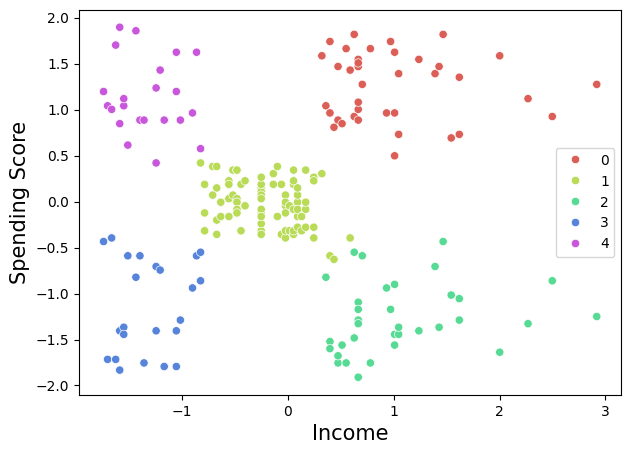

In [ ]:
# Creamos un Scatterplot discriminando los puntos por el cluster al que pertenecen (segun el modelo)
fig, (ax01) = plt.subplots(1, 1, figsize=(7,5))

X_plot02 = X_scaled #X.values

plot02 = sns.scatterplot(x = X_plot02[:,0],y = X_plot02[:,1],hue = labels,legend = 'full',
                         palette = sns.color_palette("hls", k_clusters), ax = ax01)
plot02.set_xlabel('Income',fontsize = 15)
plot02.set_ylabel('Spending Score',fontsize = 15)

In [ ]:
# Agregamos las estiquetas de cluster al dataset
data['cluster'] = labels

<ipython-input-21-b9c6383d3527>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot01 = sns.boxplot(y=data['cluster'], x=data['Age'], orient='h', ax=ax01,
<ipython-input-21-b9c6383d3527>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot02 = sns.boxplot(y=data['cluster'], x=data['Income'], orient='h', ax=ax02,


Text(0.5, 1.0, 'Countplot de clusters por género')

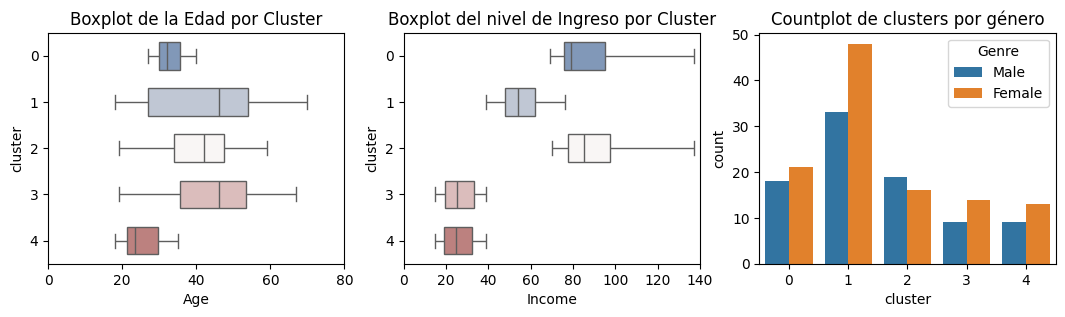

In [ ]:
# Creamos un boxplot del atributo 'Age' discriminando por cluster
fig, (ax01, ax02, ax03) = plt.subplots(1, 3, figsize=(13,3)) # Codigo para generar el area de trazado en el que se genera el grafico

# Hacemos un boxplot de la edad por cluster
plot01 = sns.boxplot(y=data['cluster'], x=data['Age'], orient='h', ax=ax01,
            whis=[0, 100], width=.6, palette="vlag")
plot01.set(xlim=(0, 80)) # Configuramos los limites del eje x
plot01.set_title('Boxplot de la Edad por Cluster')

# Hacemos un boxplot del niveld e ingreso ('Income') por cluster
plot02 = sns.boxplot(y=data['cluster'], x=data['Income'], orient='h', ax=ax02,
            whis=[0, 100], width=.6, palette="vlag")
plot02.set(xlim=(0, 140)) # Configuramos los limites del eje x
plot02.set_title('Boxplot del nivel de Ingreso por Cluster')

# Hacemos un countplot de cada cluster por género
plot03 = sns.countplot(x=data['cluster'], hue= data['Genre'])
plot03.set_title('Countplot de clusters por género')

## 4. Clustering con DBSCAN

#### Refrencias adicionales:
+ https://www.youtube.com/watch?v=RDZUdRSDOok&ab_channel=StatQuestwithJoshStarmer
+ https://www.youtube.com/watch?v=HMis89lGdkA&ab_channel=C%C3%B3digoM%C3%A1quina

+ ### Se utiliza el método make_moons para crear un set de datos bidimensional con características NO esféricas

In [ ]:
from sklearn.datasets import make_moons

<ipython-input-23-75d951663886>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sctr = ax.scatter(X_dbscan[:,0],X_dbscan[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9,


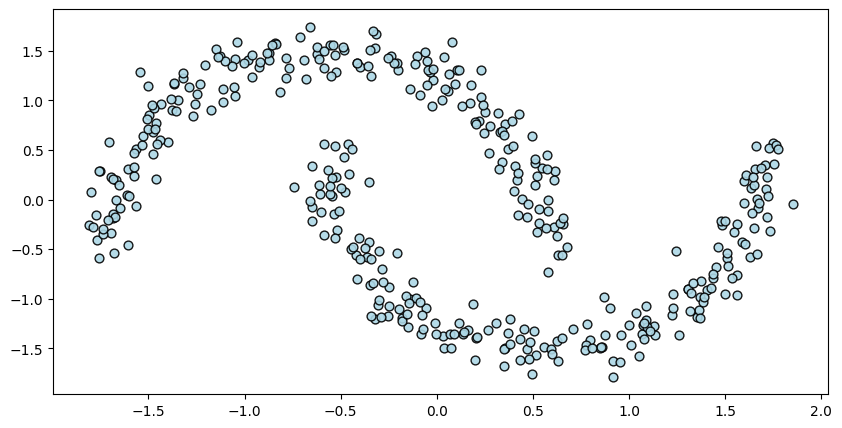

In [ ]:
# El método make_moons genera dos elementos, un array con las coordenadas (features) y otro array con los labels
X_dbscan, label = make_moons(n_samples=400, noise=0.07, random_state=19)

# Se estandariza el valor de las coordenadas (al igual que con los métodos ya vistos)
X_dbscan = StandardScaler().fit_transform(X_dbscan)

# Gráfico del set de datos estandarizado
fig, ax = plt.subplots(figsize=(10,5))
sctr = ax.scatter(X_dbscan[:,0],X_dbscan[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9,
                 cmap=plt.cm.Set1)

+ ### Se aplica K-means para ver los resultados

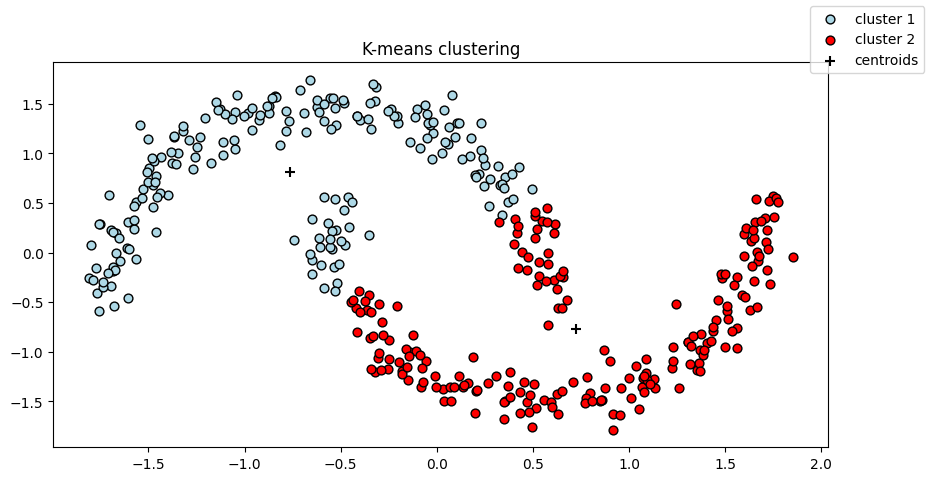

In [ ]:
# Intsnacia y entrenamiento de K-means (utilizando método fit_predict obtenemos diractamente las predicciones)
km = KMeans(n_clusters=2, random_state=19)
y_km = km.fit_predict(X_dbscan)

# Se guardan los valores de coordenadas (features) de los centroidos
centers=km.cluster_centers_;

# Gráfico de los resultados
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_dbscan[y_km==0,0], X_dbscan[y_km==0,1],c ='lightblue', edgecolor='black', marker='o',s=40, label='cluster 1')
ax.scatter(X_dbscan[y_km==1,0], X_dbscan[y_km==1,1],c ='red', edgecolor='black', marker='o',s=40, label='cluster 2')
ax.scatter(centers[0,0],centers[0,1] ,marker='+',c='k',s=60)
ax.scatter(centers[1,0],centers[1,1] ,marker='+',c='k',s=60,label='centroids')
ax.set_title('K-means clustering')
fig.legend();

+ ### Impleentación de DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN,KMeans

In [ ]:
dbscan_solhoustte = {}

In [ ]:
# Intsnacia y entrenamiento de DBSCAN (utilizando método fit_predict obtenemos diractamente las predicciones)
epsilon = 0.2
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_dbscan)
#y_dbscan


<ipython-input-28-4d1ef1a65c96>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_plot03.loc[mask_sin_ruido, ['labels_dbscan']].nunique()[0] > 1:
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


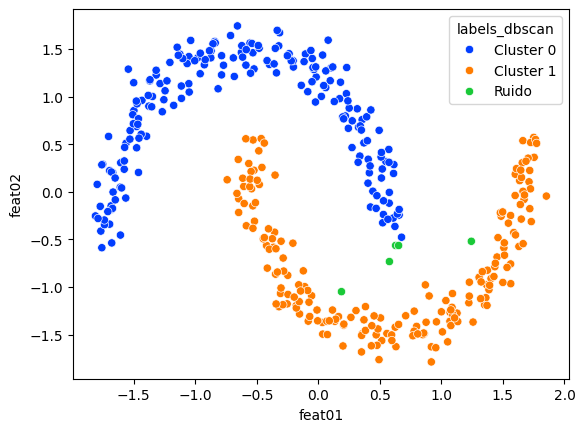

In [ ]:
# Gráfico de los resultados obtenidos con DBSCAN

# Instanciamos un dataframe que contenga las variables originales y las etiquetas generadas por DBSCAN
X_plot03 = pd.concat([pd.DataFrame(X_dbscan, columns = ['feat01', 'feat02']),
                      pd.DataFrame(labels_dbscan, columns=['labels_dbscan'])],
                     axis=1)
X_plot03['labels_dbscan'] = X_plot03['labels_dbscan'].apply(lambda x: 'Ruido' if x ==-1 else 'Cluster '+str(x))

# Graficamos discriminando los puntos por la etiqueta del clustering
sns.scatterplot(x = X_plot03['feat01'], y = X_plot03['feat02'], hue = X_plot03['labels_dbscan'], palette='bright')

# Guardamos el valor de la Silhouette
mask_sin_ruido = X_plot03['labels_dbscan'] != -2
if X_plot03.loc[mask_sin_ruido, ['labels_dbscan']].nunique()[0] > 1:
    dbscan_solhoustte['eps='+str(epsilon)+' - '+'min_s='+str(min_samples)] = silhouette_score(X_plot03.loc[mask_sin_ruido, ['feat01', 'feat02']],
                                                                                              X_plot03.loc[mask_sin_ruido, ['labels_dbscan']])
else:
    dbscan_solhoustte['eps='+str(epsilon)+' - '+'min_s='+str(min_samples)] = -0.1

+ ### ¿Como performa DBSCAN para el data set del mall?

In [ ]:
# Para probar con el dataset del centro comercial descomentar:
X_dbscan2 = X_scaled

In [ ]:
# Intsnacia y entrenamiento de DBSCAN (utilizando método fit_predict obtenemos diractamente las predicciones)
epsilon = 0.41
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_dbscan2)
#y_dbscan

<ipython-input-31-9a0ff2c2a1b3>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_plot03.loc[mask_sin_ruido, ['labels_dbscan']].nunique()[0] > 1:
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


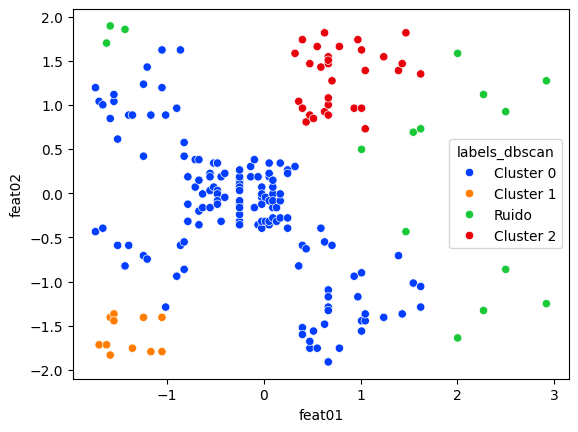

In [ ]:
# Gráfico de los resultados obtenidos con DBSCAN

# Instanciamos un dataframe que contenga las variables originales y las etiquetas generadas por DBSCAN
X_plot03 = pd.concat([pd.DataFrame(X_dbscan2, columns = ['feat01', 'feat02']),
                      pd.DataFrame(labels_dbscan, columns=['labels_dbscan'])],
                     axis=1)
X_plot03['labels_dbscan'] = X_plot03['labels_dbscan'].apply(lambda x: 'Ruido' if x ==-1 else 'Cluster '+str(x))

# Graficamos discriminando los puntos por la etiqueta del clustering
sns.scatterplot(x = X_plot03['feat01'], y = X_plot03['feat02'], hue = X_plot03['labels_dbscan'], palette='bright')

# Guardamos el valor de la Silhouette
mask_sin_ruido = X_plot03['labels_dbscan'] != -2
if X_plot03.loc[mask_sin_ruido, ['labels_dbscan']].nunique()[0] > 1:
    dbscan_solhoustte['eps='+str(epsilon)+' - '+'min_s='+str(min_samples)] = silhouette_score(X_plot03.loc[mask_sin_ruido, ['feat01', 'feat02']],
                                                                                              X_plot03.loc[mask_sin_ruido, ['labels_dbscan']])
else:
    dbscan_solhoustte['eps='+str(epsilon)+' - '+'min_s='+str(min_samples)] = -0.1

In [ ]:
# # Se graficó las sumas de las distancias
# fig, ax = plt.subplots(1,1 , figsize=(17,5))
# sns.lineplot(x=dbscan_solhoustte.keys(),y=dbscan_solhoustte.values(), marker='o',size=30,legend=False);
# plt.axhline(0, color='r', linestyle = '--')
# plt.ylabel('Silhouette');plt.xlabel('Hiperparametros DBSCAN: epsilon - min_samples'); plt.xticks(rotation=45); plt.ylim(-0.2,1)

## 5. Clustering con K-means utilizando métricas de distancias distintas

+ ### La implementación de K-means en SciKit-Learn está hecha con distancia euclideana como métrica de distancia y no admite modificaciones.
+ ### Para implementar un K-means con otras métricas haremos uso de la librería _pyclustering_
+ https://pyclustering.github.io/docs/0.8.2/html/d1/d2a/namespacepyclustering_1_1cluster.html

In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=449517dbfb446950b1815da824314493609ac870fd10266487511dfc75b8a25d
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


In [ ]:
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [ ]:
# Reutilizamos el set de entrenamiento
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

https://pyclustering.github.io/docs/0.9.3/html/da/d3a/classpyclustering_1_1utils_1_1metric_1_1type__metric.html

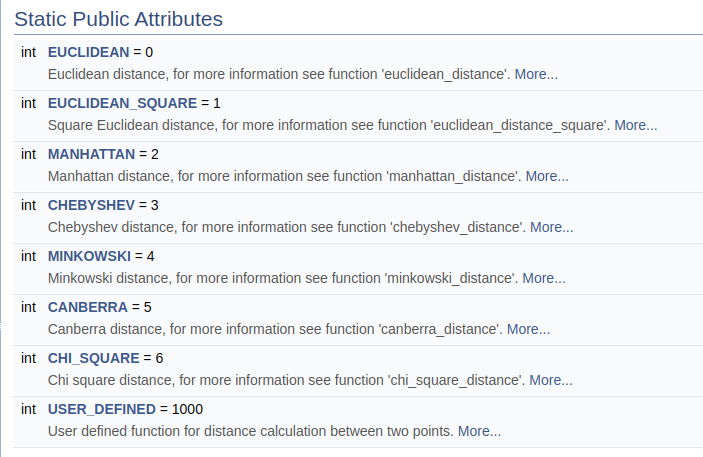

In [ ]:
# Diccionario con todas las métricas y su codificación
distance_measures = {'euclidean': 0, 'squared euclidean': 1,
                    'manhattan': 2, 'chebyshev': 3, 'minkowski': 4, 'canberra': 5, 'chi-square': 6}

In [ ]:
# Instanciamos una varible con la métrica de distancia elegida:
metric = 0 # Utilizar el diccionario de la celda anterior para seleccionar la métrica
k_centroids = 5
degree = 55

In [ ]:
# Para implementar K-means con pyclustering es necesario instanciar un objeto de inicialización de centroides
initial_centers = random_center_initializer(X_scaled, k_centroids, random_state=47).initialize()
# Se instancia el modelo ingresando como parámetros el set de entrenamuiento, el objeto de inicialización y la métrica elegida

if metric == 4:
  # En caso de usar Minkowski un parametro extra debe ser especificado ('degree'), dentro de distance_metric
  instanceKm = kmeans(X_scaled, initial_centers=initial_centers, metric=distance_metric(4, degree=degree))
else:
  instanceKm = kmeans(X_scaled, initial_centers=initial_centers, metric=distance_metric(metric))


In [ ]:
# Entrenamos el modelo de clustering K-means (notar la diferencia en la sintaxis con respecto a sklearn)
instanceKm.process()

In [ ]:
# Extraemos los grupos de clusters
pyClusters = instanceKm.get_clusters()


In [ ]:
# Extraemos las etiquetas de los clusters para cada dato
# En este caso es necesario un encoder propio de la librería para asignar las etiquetas
pyCenters = instanceKm.get_centers()
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X_scaled)
pyLabels = pyEncoder.set_encoding(0).get_clusters()

<Axes: xlabel='Income', ylabel='Spending Score'>

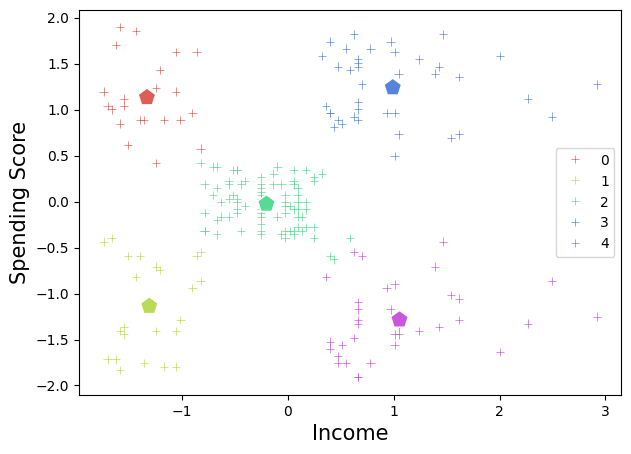

In [ ]:
# Creamos un Scatterplot discriminando los puntos por el cluster al que pertenecen (segun el modelo)
fig, (ax01) = plt.subplots(1, 1, figsize=(7,5)) # Comandos para controlar el area de grafico

X_plot02 = X_scaled #X.values

plot02 = sns.scatterplot(x = X_plot02[:,0],y = X_plot02[:,1],hue = pyLabels,legend = 'full', #Ingresamos las coordenadas de cada dato, y en hue un listado con sus respectivos clusters asignados
                         palette = sns.color_palette("hls", k_centroids), ax = ax01, marker = '+') # Seleccionamos la paleta de colores y estilo del marcador

plot02.set_xlabel('Income',fontsize = 15) # Numbre del eje X
plot02.set_ylabel('Spending Score',fontsize = 15) # Nombre del eje Y
print()


sns.scatterplot(x = np.array(pyCenters)[:,0], y = np.array(pyCenters)[:,1], # Usamos las coordenadas de los centroides, ayudandonos de numpy para indexarlo
                palette = sns.color_palette("hls", k_centroids), # Elegimos la misma paleta de colores que el scatterplot de etiquetas (clusters) de datos
                hue = np.unique(pyLabels), # Para hue es necesario hacer un recuento de valores unicos
                marker='p', s = 180, # Utilizamos un marcador distinto para distinguir los centroides de los datos clusterizados
                legend=False) # Omitimos la leyenda para ganar claridad en el grafico